# Problem 1

In [213]:
import math
import queue
import numpy as np
import matplotlib.pyplot as plt

In [214]:
def getErlang2(u1, u2, l=1):
    return (-np.log(u1)/(2*l)) + (-np.log(u2)/(2*l))

# u is a number drawn from a random uniform distribution (between 0 and 1)
# l is the rate of the exp distrbution
def getEXP(u,l=1):
    return -np.log(u)/l

In [215]:
# Returns a list of all the values from a given list larger than a specific value
def getSmaller(list2Check, value):
    return [x for x in list2Check if x <= value]

def addToQueue(list2Check, que):

    # add to queue
    if que.empty():
        for value in list2Check:
            que.put(value)
        return que

    # When queue has elementsd
    for value in list2Check:
        # add to queue
        if value > que.queue[-1]:
            que.put(value)

    return que

In [234]:
def graph(x, xlabel, ylabel, title, isDiscrete=True):

    if isDiscrete:
        plt.plot(x, marker='x')
    else:
        plt.plot(x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return 0

In [235]:
# Figure 6.3
def make6_3(N_k, exit_times, continuous_service, continuous_arrivals,k=1000):

    arrival_queue = queue.Queue(maxsize=k-1)
    service_queue = queue.Queue(maxsize=1)
    
    for index, k in enumerate(continuous_service):
        service_queue.put(k)
        possible_arrivals = getSmaller(continuous_arrivals,k)
        addToQueue(possible_arrivals, arrival_queue)

        exit_times[index+1] = service_queue.get()
        if not arrival_queue.empty():
            arrival_queue.get()
        
        if len(N_k) > index + 1:
            N_k[index+1] = arrival_queue.qsize()

    return N_k, exit_times

In [236]:
# Figure 6.4
def make6_4(N_k, exit_times):
    X_t = []
    final_time = int( np.ceil(exit_times[-1]) )
    
    for t in range(final_time):

        # Get the index of times less than current time
        result = np.where(exit_times <= t)
        target_index = result[0][-1]
        target_val = N_k[target_index]
        X_t.append(target_val)
        
    return X_t

In [237]:
# Figure 6.6
def make6_6(W_n, exit_times):
    Y_t = []
    final_time = int( np.ceil(exit_times[-1]) )
    
    for t in range(final_time):

        # Get the index of times less than current time
        result = np.where(exit_times <= t)
        target_index = result[0][-1]
        target_val = W_n[target_index]
        Y_t.append(target_val)
    
    return Y_t

In [238]:
# Arrival time = exponentially distributed
# Service time = erlang distribution
# Iterations = number of seconds
def simulate_M_E2_1(total_jobs=1000, arrival_rate=1, mean_service_time=0.8):

    k = total_jobs # Total number of jobs
    rand_samples1 = np.random.random_sample((k,))
    rand_samples2 = np.random.random_sample((k,))
    rand_samples3 = np.random.random_sample((k,))

    arrival_times = np.zeros(k)
    continuous_arrivals = np.zeros(k)
    service_times = np.zeros(k)
    continuous_service = np.zeros(k)

    # Setting rates
    for i,_ in enumerate(arrival_times):
        arrival_times[i] = getEXP(rand_samples1[i])
        service_times[i] = getErlang2(rand_samples2[i], rand_samples3[i])

        if i == 0:
            continuous_arrivals[i] = arrival_times[i]
            continuous_service[i] = service_times[i] + arrival_times[i]

        else:
            continuous_arrivals[i] = arrival_times[i] + continuous_arrivals[i-1]
            continuous_service[i] = service_times[i] + continuous_service[i-1] #+ continuous_arrivals[i-1]

            # Because a service cannot be serviced before it arrives
            time_diff = continuous_service[i] - continuous_arrivals[i]
            if time_diff < 0:
                continuous_service[i] += -time_diff

    return continuous_service, continuous_arrivals

In [239]:
total_jobs = 2000
N_k = np.zeros(total_jobs + 1)
exit_times = np.copy(N_k) # related to X_t and Y_t
W_n = np.zeros(total_jobs + 1)

#DISCRETE = True
CONTINUOUS = False

continuous_service, continuous_arrivals = simulate_M_E2_1(total_jobs)

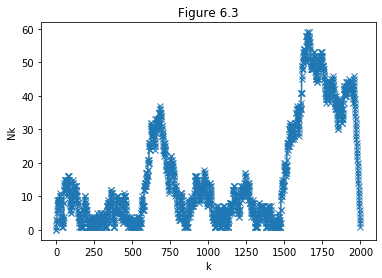

0

In [240]:
# Figure 6.3
N_k, exit_times = make6_3(N_k, exit_times, continuous_service, continuous_arrivals, total_jobs)
graph(N_k,"k","Nk", "Figure 6.3")

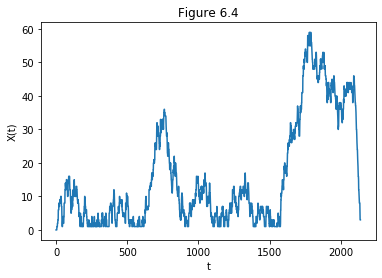

0

In [241]:
# Figure 6.4
X_t = make6_4(N_k, exit_times)
graph(X_t,"t","X(t)", "Figure 6.4", CONTINUOUS)

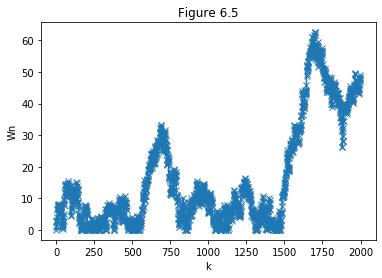

0

In [242]:
# Figure 6.5
W_n = continuous_service - continuous_arrivals
graph(W_n,"k","Wn", "Figure 6.5")

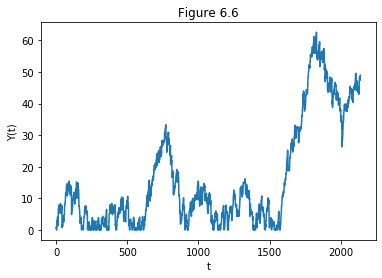

0

In [243]:
# Figure 6.6
Y_t = make6_6(W_n, exit_times)
graph(Y_t,"t","Y(t)", "Figure 6.6", CONTINUOUS)

# Problem 2

# k = 1

In [244]:
total_jobs = 2000
N_k = np.zeros(total_jobs + 1)
exit_times = np.copy(N_k) # related to X_t and Y_t
W_n = np.zeros(total_jobs + 1)

#DISCRETE = True
CONTINUOUS = False

k_1 = []
for _ in range(30):
    continuous_service, continuous_arrivals = simulate_M_E2_1(total_jobs)
    N_k,_ = make6_3(N_k, exit_times, continuous_service, continuous_arrivals, total_jobs)
    
    k_1.append(N_k[1])
    
k_1 = np.array(k_1)
print("Mean =", np.mean(k_1))
print("Variance =", np.var(k_1))

Mean = 1.0666666666666667
Variance = 1.8622222222222224


# k = 5

In [245]:
total_jobs = 2000
N_k = np.zeros(total_jobs + 1)
exit_times = np.copy(N_k) # related to X_t and Y_t
W_n = np.zeros(total_jobs + 1)

#DISCRETE = True
CONTINUOUS = False

k_5 = []
for _ in range(30):
    continuous_service, continuous_arrivals = simulate_M_E2_1(total_jobs)
    N_k,_ = make6_3(N_k, exit_times, continuous_service, continuous_arrivals, total_jobs)
    
    k_5.append(N_k[5])
    
k_5 = np.array(k_5)
print("Mean =", np.mean(k_5))
print("Variance =", np.var(k_5))

Mean = 3.3666666666666667
Variance = 6.565555555555556


# k = 10

In [246]:
total_jobs = 2000
N_k = np.zeros(total_jobs + 1)
exit_times = np.copy(N_k) # related to X_t and Y_t
W_n = np.zeros(total_jobs + 1)

#DISCRETE = True
CONTINUOUS = False

k_10 = []
for _ in range(30):
    continuous_service, continuous_arrivals = simulate_M_E2_1(total_jobs)
    N_k,_ = make6_3(N_k, exit_times, continuous_service, continuous_arrivals, total_jobs)
    
    k_10.append(N_k[10])
    
k_10 = np.array(k_10)
print("Mean =", np.mean(k_10))
print("Variance =", np.var(k_10))

Mean = 4.033333333333333
Variance = 7.165555555555557


# k = 100

In [247]:
total_jobs = 2000
N_k = np.zeros(total_jobs + 1)
exit_times = np.copy(N_k) # related to X_t and Y_t
W_n = np.zeros(total_jobs + 1)

#DISCRETE = True
CONTINUOUS = False

k_100 = []
for _ in range(30):
    continuous_service, continuous_arrivals = simulate_M_E2_1(total_jobs)
    N_k,_ = make6_3(N_k, exit_times, continuous_service, continuous_arrivals, total_jobs)
    
    k_100.append(N_k[100])
    
k_100 = np.array(k_100)
print("Mean =", np.mean(k_100))
print("Variance =", np.var(k_100))

Mean = 15.5
Variance = 188.78333333333333


# k = 200

In [248]:
total_jobs = 2000
N_k = np.zeros(total_jobs + 1)
exit_times = np.copy(N_k) # related to X_t and Y_t
W_n = np.zeros(total_jobs + 1)

#DISCRETE = True
CONTINUOUS = False

k_200 = []
for _ in range(30):
    continuous_service, continuous_arrivals = simulate_M_E2_1(total_jobs)
    N_k,_ = make6_3(N_k, exit_times, continuous_service, continuous_arrivals, total_jobs)
    
    k_200.append(N_k[200])
    
k_200 = np.array(k_200)
print("Mean =", np.mean(k_200))
print("Variance =", np.var(k_200))

Mean = 27.466666666666665
Variance = 1233.982222222222


# k = 1000

In [249]:
total_jobs = 2000
N_k = np.zeros(total_jobs + 1)
exit_times = np.copy(N_k) # related to X_t and Y_t
W_n = np.zeros(total_jobs + 1)

#DISCRETE = True
CONTINUOUS = False

k_1000 = []
for _ in range(30):
    continuous_service, continuous_arrivals = simulate_M_E2_1(total_jobs)
    N_k,_ = make6_3(N_k, exit_times, continuous_service, continuous_arrivals, total_jobs)
    
    k_1000.append(N_k[1000])
    
k_1000 = np.array(k_1000)
print("Mean =", np.mean(k_1000))
print("Variance =", np.var(k_1000))

Mean = 86.46666666666667
Variance = 31329.582222222227


# I found that the larger the value of K, the larger the mean and variance. This is likely due to the fact that the values picked from the uniform distribution randomly are unique so there is a larger number of values picked for larger k values and thus larger randomness and variation even with a sample size of just 30.